<a href="https://colab.research.google.com/github/douglasgomezr/IMP-Notebooks/blob/master/Evaluaci%C3%B3n_de_proyecto_de_inversi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install numpy-financial

**Script para calcular VPN, TIR y periodo de recuperación**

In [6]:
import numpy_financial as npf
import numpy as np

In [7]:
# 1) Flujos de efectivo: 12 meses negativos más 36 meses positivos
flujo_efectivo = ([-473_228] * 12) + ([230_753.60] * 36)

# 2)Tasa de rendimiento mínima aceptada (TREMA) mensual
trema_mensual = 0.00797414

# 3) Cálculo de Valores Presente Neto (VPN) y Tasa Interna de Retorno (TIR)
vpn = npf.npv(trema_mensual, flujo_efectivo)
tir_mensual = npf.irr(flujo_efectivo)
tir_anual = (1 + tir_mensual)**12 - 1

print(f"VPN (usando TREMA mensual de {trema_mensual*100:.4f}%): ${vpn:,.2f} pesos (MXN)")
print(f"TIR mensual: {tir_mensual*100:.2f}%")
print(f"TIR anual:   {tir_anual*100:.2f}%\n")

# 4) Función para encontrar periodo de recuperación (con flujo de efectivo descontado)
def periodo_recuperacion_descontado(flujos, tasa_descuento):
    """
    Retorna el primer periodo (t) en que la suma acumulada
    de flujos descontados pasa de negativo a 0 a positivo.
    Si nunca se hace positiva, devuelve None.
    """
    acumulado = 0.0
    for t, cf in enumerate(flujos):
        # Descontar el flujo al periodo t
        valor_presente = cf / ((1 + tasa_descuento) ** t)
        acumulado += valor_presente
        if acumulado >= 0:
            return t
    return None

# 5) Resumen de flujos descontados con TREMA mensual
flujos_descontados = [
    cf / ((1 + trema_mensual)**t)
    for t, cf in enumerate(flujo_efectivo)
]
flujos_descontados_acumulados = np.cumsum(flujos_descontados)

print("Mes |   Flujo Original  |  Flujo Descontado  | Acumulado Descontado")
print("----|-------------------|--------------------|---------------------")
for t, (f_ori, f_desc, f_acum) in enumerate(zip(flujo_efectivo, flujos_descontados, flujos_descontados_acumulados)):
    print(f"{t:2d}   | {f_ori:14,.2f}   | {f_desc:16,.2f}   | {f_acum:18,.2f}")

# 6) Periodo de recuperación (con flujos descontados) con TREMA mensual
recuperacion= periodo_recuperacion_descontado(flujo_efectivo, trema_mensual)

if recuperacion is not None:
    print(f"\nEl periodo de recuperación con flujo descontado es el mes {recuperacion}.")
else:
    print("\nEl proyecto no recupera la inversión de forma descontada.")


VPN (usando TREMA mensual de 0.7974%): $1,156,287.98 pesos (MXN)
TIR mensual: 1.65%
TIR anual:   21.73%

Mes |   Flujo Original  |  Flujo Descontado  | Acumulado Descontado
----|-------------------|--------------------|---------------------
 0   |    -473,228.00   |      -473,228.00   |        -473,228.00
 1   |    -473,228.00   |      -469,484.27   |        -942,712.27
 2   |    -473,228.00   |      -465,770.15   |      -1,408,482.42
 3   |    -473,228.00   |      -462,085.42   |      -1,870,567.83
 4   |    -473,228.00   |      -458,429.83   |      -2,328,997.67
 5   |    -473,228.00   |      -454,803.17   |      -2,783,800.84
 6   |    -473,228.00   |      -451,205.20   |      -3,235,006.03
 7   |    -473,228.00   |      -447,635.69   |      -3,682,641.72
 8   |    -473,228.00   |      -444,094.41   |      -4,126,736.13
 9   |    -473,228.00   |      -440,581.16   |      -4,567,317.29
10   |    -473,228.00   |      -437,095.70   |      -5,004,412.99
11   |    -473,228.00   |      -4

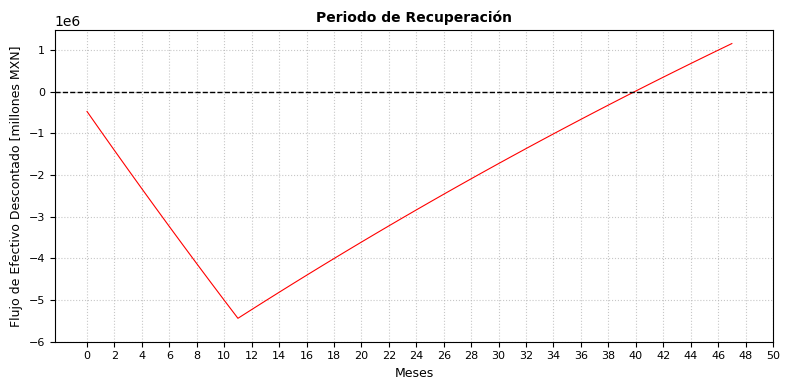

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(0,48,1),flujos_descontados_acumulados, label='Flujo de Efectivo', color='red', lw=0.8)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

ax.set_title('Periodo de Recuperación', fontsize=10, fontweight='bold')
ax.set_xlabel('Meses', fontsize=9)
ax.set_ylabel('Flujo de Efectivo Descontado [millones MXN]', fontsize=9)
ax.set_xticks(np.arange(0, 51, 2))
ax.set_yticks(np.arange(-6e6, 2e6, 1e6))
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)


ax.grid(True, which='major', linestyle=':', alpha=0.7)
fig.tight_layout()
plt.show()